In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('NNtrain.csv')

In [15]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [22]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def relU(Z):
    return np.maximum(Z, 0)

def softMax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def relU_derivative(Z):
    return Z > 0

def one_hot_en(Y):
    one_hot_en_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_en_Y[np.arange(Y.size), Y] = 1
    one_hot_en_Y = one_hot_en_Y.T
    return one_hot_en_Y

def forward_propogation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softMax(Z2)
    return Z1, A1, Z2, A2

def backward_propogation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_en_Y = one_hot_en(Y)
    dZ2 = A2 - one_hot_en_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propogation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propogation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 6 0 ... 7 1 7] [5 5 3 ... 3 7 2]
0.09007317073170731
Iteration:  10
[1 3 0 ... 0 1 7] [5 5 3 ... 3 7 2]
0.18365853658536585
Iteration:  20
[7 0 0 ... 0 0 1] [5 5 3 ... 3 7 2]
0.2566829268292683
Iteration:  30
[7 0 0 ... 0 7 1] [5 5 3 ... 3 7 2]
0.31570731707317073
Iteration:  40
[7 0 0 ... 0 7 1] [5 5 3 ... 3 7 2]
0.38014634146341464
Iteration:  50
[7 0 0 ... 0 7 1] [5 5 3 ... 3 7 2]
0.432
Iteration:  60
[7 3 0 ... 0 7 1] [5 5 3 ... 3 7 2]
0.48385365853658535
Iteration:  70
[7 3 0 ... 0 7 1] [5 5 3 ... 3 7 2]
0.5269512195121951
Iteration:  80
[7 3 0 ... 0 7 8] [5 5 3 ... 3 7 2]
0.5632195121951219
Iteration:  90
[7 3 0 ... 0 7 8] [5 5 3 ... 3 7 2]
0.5931463414634146
Iteration:  100
[5 3 0 ... 0 7 8] [5 5 3 ... 3 7 2]
0.6181463414634146
Iteration:  110
[5 3 0 ... 5 7 8] [5 5 3 ... 3 7 2]
0.6403658536585366
Iteration:  120
[5 3 0 ... 5 7 8] [5 5 3 ... 3 7 2]
0.6610731707317073
Iteration:  130
[5 5 0 ... 5 7 8] [5 5 3 ... 3 7 2]
0.6767317073170732
Iteration:  140
[5 5 0 ..

Prediction:  [5]
Label:  5


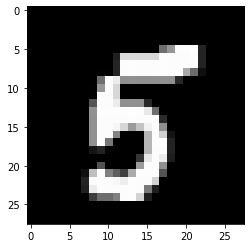

Prediction:  [5]
Label:  5


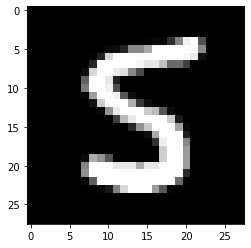

Prediction:  [3]
Label:  3


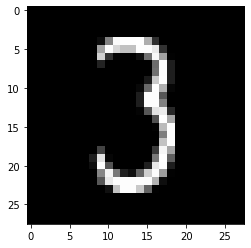

Prediction:  [2]
Label:  2


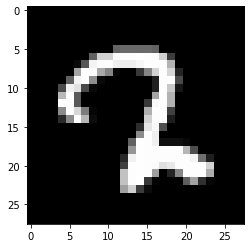

In [26]:
test_prediction(4, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)